/root/.virtualenvs/RLRetriever-qQodSt4H/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cluster training...


dist:0.0187, max/min: 20.2: 100% 20/20 [00:02<00:00,  9.53it/s]
dist:0.0118, max/min: 19.7: 100% 20/20 [00:00<00:00, 176.89it/s]
dist:0.0115, max/min: 18.3: 100% 20/20 [00:00<00:00, 167.92it/s]
dist:0.0093, max/min: 18.4: 100% 20/20 [00:00<00:00, 159.84it/s]
dist:0.0119, max/min: 15.4: 100% 20/20 [00:00<00:00, 169.24it/s]
dist:0.0095, max/min: 13.5: 100% 20/20 [00:00<00:00, 168.67it/s]
dist:0.0093, max/min: 13.8: 100% 20/20 [00:00<00:00, 156.24it/s]
dist:0.0150, max/min: 14.9: 100% 20/20 [00:00<00:00, 157.55it/s]
dist:0.0118, max/min: 12.2: 100% 20/20 [00:00<00:00, 143.77it/s]
dist:0.0050, max/min: 13.6: 100% 20/20 [00:00<00:00, 142.26it/s]
dist:0.0090, max/min: 12.2: 100% 20/20 [00:00<00:00, 140.21it/s]
dist:0.0098, max/min: 13.1: 100% 20/20 [00:00<00:00, 145.78it/s]
dist:0.0097, max/min: 12.9: 100% 20/20 [00:00<00:00, 172.89it/s]
dist:0.0052, max/min: 11.6: 100% 20/20 [00:00<00:00, 146.71it/s]
dist:0.0113, max/min: 14.3: 100% 20/20 [00:00<00:00, 159.07it/s]
dist:0.0138, max/min: 13.4

cluster building...
Maximum cluster: [959, 966, 981, 985, 985, 987, 1017, 1023, 1049, 11048] , minimum cluster: [959, 966, 981, 985, 985, 987, 1017, 1023, 1049, 11048] All: [1017, 11048, 1049, 985, 981, 985, 1023, 959, 987, 966]
build idx done...
sorting...
build cluster done...
tensor([[-0.8728,  0.4528],
        [ 0.7061,  0.7058],
        [ 0.1482,  0.9726],
        [-0.6926, -0.6986],
        [ 0.4635, -0.8690],
        [-0.4565,  0.8726],
        [-0.1307, -0.9744],
        [ 0.9704,  0.1663],
        [ 0.8809, -0.4355],
        [-0.9684, -0.1709]], device='cuda:0')


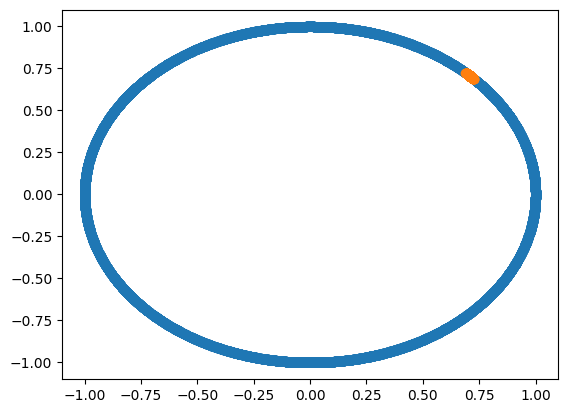

In [1]:


import torch
from time import time
from DocBuilder.utils import split_list_to_batch, restore_batched_list, unbind_sparse, top_k_sparse, tensor_retuen_type
from DocBuilder.Retriever_k_means import cluster_builder
import matplotlib.pyplot as plt
i = torch.rand([32,5,30522])
n = torch.rand([32,5,16,30522])
print(i.unsqueeze(2)@n.T)


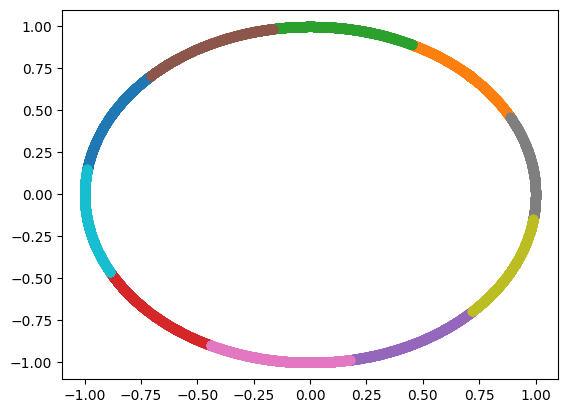

In [3]:
for c in cluster.clusted_data:
    plt.scatter(c[:,0],c[:,1])
